# 단순 선형 회귀
## #01. 패키지 준비하기


In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop,SGD # 옵티마이저
from tensorflow.keras.losses import mse         # 활성화 함수
import pandas as pd 



## #02. 데이터 준비

In [2]:
origin = pd.read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## #03. 데이터 전처리

In [3]:
origin.isnull().sum()

speed    0
dist     0
dtype: int64

## #04. 데이터 확인

In [4]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### 산점도 그래프와 추세선 확인

곡선보다는 선형 분포에 가까우므로 단순 선형 회귀모델을 적용


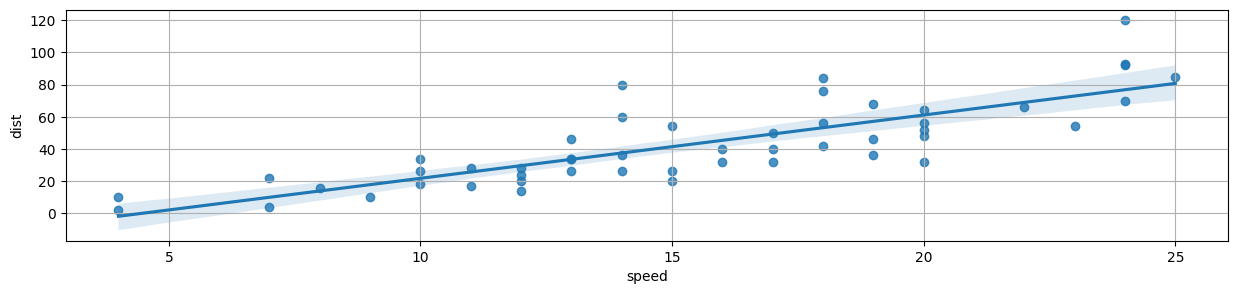

In [5]:
plt.figure(figsize=(15,3))

sns.regplot(data=origin,x='speed',y='dist')
plt.grid()
plt.show()
plt.close()

## #05. 데이터 분할

### 랜덤시드 고정

In [6]:
np.random.seed(777)

### 훈련데이터와 종속변수 구분


In [7]:
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print('독립변수 : ',x.shape,'종속변수 : ',y.shape)

독립변수 :  (50, 1) 종속변수 :  (50,)


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=777)
print(len(y_train),len(x_test))


35 15


## #06.모델개발
### 1.모델 정의

In [9]:
model = Sequential()
model.add(Dense(10,activation = 'relu',input_shape=(1,)))
model.add(Dense(1,activation='linear'))

model.compile(optimizer=SGD(),loss='mse',metrics = ['mae'])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001DA995C0370>>

### 2. 학습하기

In [10]:
result = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs',inplace=True)
result_df

Epoch 1/500


2/2 [==============================] - 1s 242ms/step - loss: 2207.2783 - mae: 39.5645 - val_loss: 1527.5457 - val_mae: 33.4129
Epoch 2/500
2/2 [==============================] - 0s 44ms/step - loss: 2197.1982 - mae: 39.4524 - val_loss: 1520.1030 - val_mae: 33.3140
Epoch 3/500
2/2 [==============================] - 0s 44ms/step - loss: 2186.8252 - mae: 39.3419 - val_loss: 1512.6715 - val_mae: 33.2151
Epoch 4/500
2/2 [==============================] - 0s 44ms/step - loss: 2176.9202 - mae: 39.2327 - val_loss: 1505.7982 - val_mae: 33.1235
Epoch 5/500
2/2 [==============================] - 0s 42ms/step - loss: 2167.7000 - mae: 39.1307 - val_loss: 1499.1907 - val_mae: 33.0350
Epoch 6/500
2/2 [==============================] - 0s 42ms/step - loss: 2158.3992 - mae: 39.0315 - val_loss: 1492.6005 - val_mae: 32.9465
Epoch 7/500
2/2 [==============================] - 0s 41ms/step - loss: 2149.4338 - mae: 38.9325 - val_loss: 1485.8915 - val_mae: 32.8562
Epoch 8/500
2/2 [============================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2207.278320,39.564468,1527.545654,33.412895
2,2197.198242,39.452423,1520.103027,33.314045
3,2186.825195,39.341949,1512.671509,33.215126
4,2176.920166,39.232677,1505.798218,33.123497
5,2167.699951,39.130722,1499.190674,33.035019
...,...,...,...,...
496,273.336945,13.003647,248.684616,12.900725
497,273.339966,13.003544,248.720779,12.903753
498,273.291168,13.002934,248.873825,12.916092


### 7) 학습 결과 평가
#### 1. 학습결과 시각화

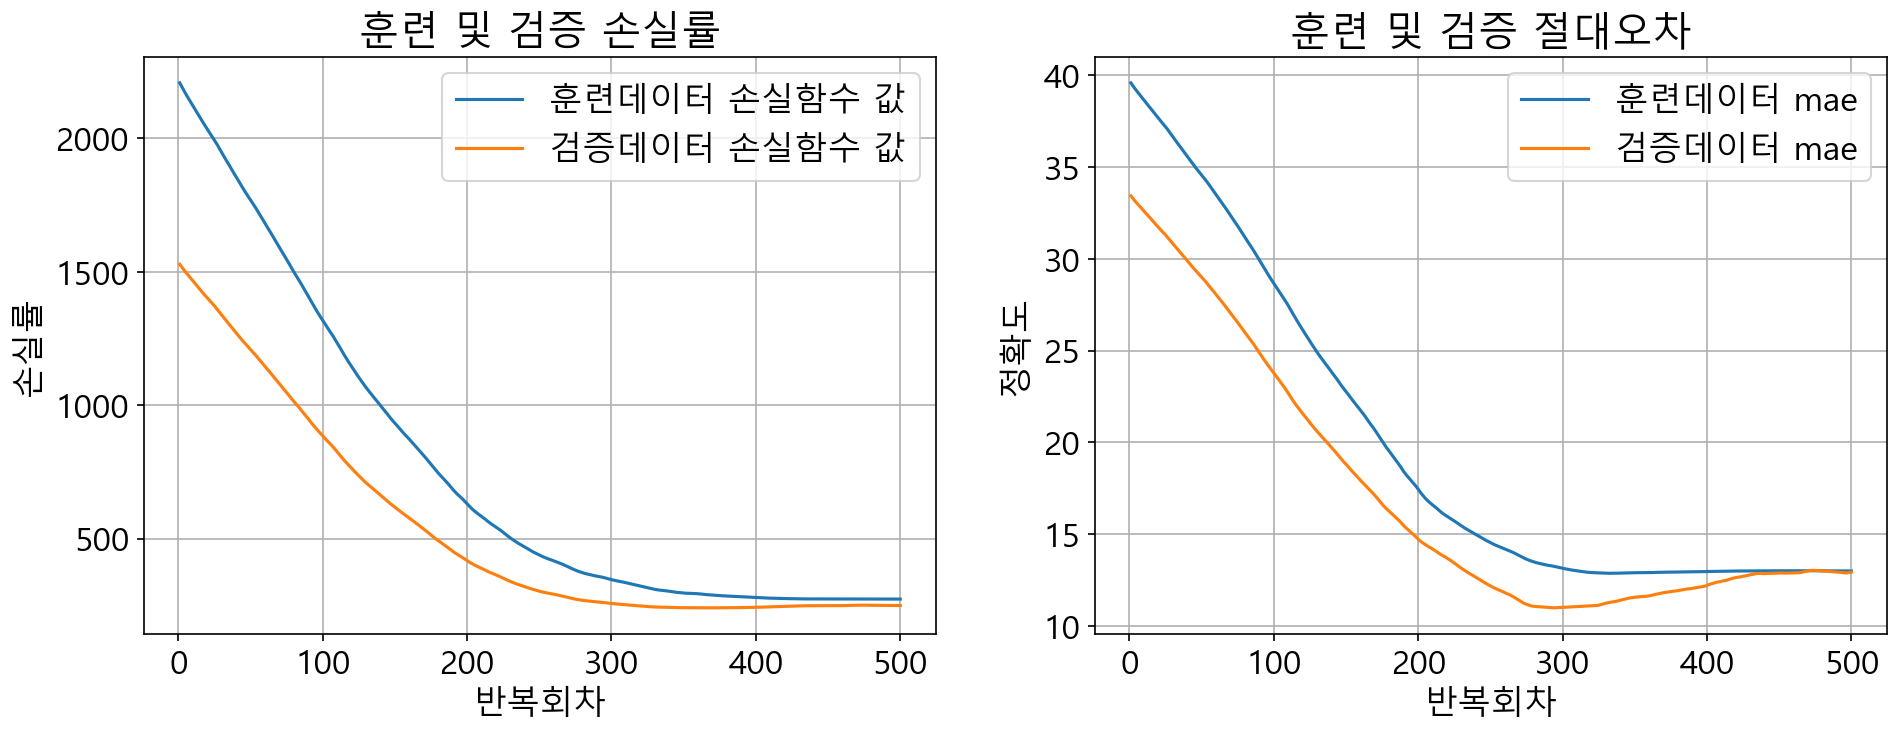

In [11]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index , y='loss',data = result_df,label = '훈련데이터 손실함수 값',ax=ax1)
sns.lineplot(x=result_df.index , y= 'val_loss',data=result_df,label = '검증데이터 손실함수 값',ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()
# 2) 훈련 및 검증 절대오차 그리기
sns.lineplot(x=result_df.index,y='mae',data=result_df,label='훈련데이터 mae',ax=ax2)
sns.lineplot(x=result_df.index,y='val_mae',data=result_df,label='검증데이터 mae',ax=ax2)

ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

#### 2. 모델 성능 평가

In [12]:
evaluate1 = model.evaluate(x_train,y_train)

evaluate2 = model.evaluate(x_test,y_test)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate2[0], evaluate2[1]))



1/1 [==============================] - 0s 30ms/step - loss: 249.1646 - mae: 12.9393
최종 훈련 손실률: 273.192230, 최종 훈련 절대오차: 13.005211
최종 훈련 손실률: 249.164597, 최종 훈련 절대오차: 12.939274


## #08. 학습 결과 적용
### 1. 테스트 데이터에 대한 예측 결과 산정

In [13]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 99ms/step
[[66.75617 ]
 [38.50544 ]
 [35.680367]
 [32.855293]
 [55.45588 ]
 [41.330513]
 [41.330513]
 [52.630806]
 [35.680367]
 [55.45588 ]
 [41.330513]
 [58.280952]
 [21.554998]
 [38.50544 ]
 [13.079779]]


### 2. 결과 데이터 구성

In [14]:
x_test

,speed
44,23
17,13
11,12
9,11
36,19
21,14
22,14
31,18
12,12
37,19


In [15]:
y_test

44    54
17    34
11    14
9     17
36    46
21    60
22    80
31    42
12    20
37    68
19    26
41    56
3     22
16    34
0      2
Name: dist, dtype: int64

In [17]:
x_test

,speed
44,23
17,13
11,12
9,11
36,19
21,14
22,14
31,18
12,12
37,19


In [18]:
kdf = pd.DataFrame({
    '검증데이터  ' : x_test['speed'],
    '실제값  ': y_test,
    '예측값' : results.flatten(),
    
})
kdf.columns=['검증데이터','실제값','예측값']
kdf['예측오차'] = kdf['실제값'] - kdf['예측값']
kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,66.756172,-12.756172
17,13,34,38.505440,-4.505440
11,12,14,35.680367,-21.680367
9,11,17,32.855293,-15.855293
36,19,46,55.455879,-9.455879
21,14,60,41.330513,18.669487
22,14,80,41.330513,38.669487
31,18,42,52.630806,-10.630806
12,12,20,35.680367,-15.680367
37,19,68,55.455879,12.544121


In [19]:
kdf.head()

,검증데이터,실제값,예측값,예측오차
44,23,54,66.756172,-12.756172
17,13,34,38.505440,-4.505440
11,12,14,35.680367,-21.680367
9,11,17,32.855293,-15.855293
36,19,46,55.455879,-9.455879


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

<Axes: xlabel='검증데이터', ylabel='예측값'>

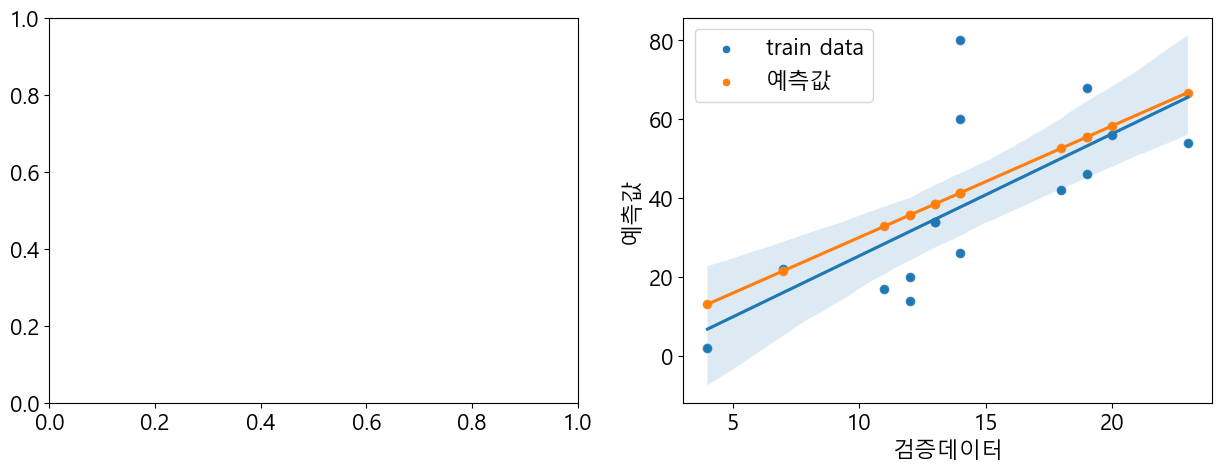

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
## 관측치 시각화
sns.scatterplot(x=kdf['검증데이터'],y=kdf['실제값'],label = 'train data')
# ## 관측치 선그래프
sns.regplot(x=kdf['검증데이터'],y=kdf['실제값'])

## 예측치 시각화
sns.scatterplot(x=kdf['검증데이터'],y=kdf['예측값'],label = '예측값')
# ## 예측치 선그래프
sns.regplot(x=kdf['검증데이터'],y=kdf['예측값'])



### 3. 임의의 값에 대한 머신러닝 예측 결과


In [28]:
my_speed = 50
results= model.predict([[my_speed]])
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 122ms/step
속도가 50인 자동차의 제동거리는 143로 예상됩니다.
